# Training Models

In [38]:
# Imports required packages
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Linear Regression

### Linear Regression Model

$$\hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$

where 
- ŷ is the predicted value.
- n is the number of features.
- x<sub>i</sub> is the ith feature value.
- θ<sub>j</sub> is the j<sup>th</sup> model parameter (including the bias term θ<sub>0</sub> and the feature weights θ<sub>1</sub>, θ<sub>2</sub>, ⋯, θ<sub>n</sub>).

This can be written much more concisely using a vectorized form as shown below.

$$\hat{y} = h_\theta(x) = \theta.x$$

where
- θ is the model’s parameter vector, containing the bias term θ<sub>0</sub> and the feature weights θ<sub>1</sub> to θ<sub>n</sub>
- x is the instance’s feature vector, containing x<sub>0</sub> to x<sub>n</sub>, with x<sub>0</sub> always equal to 1
- θ·x is the dot product of the vectors θ and x, which is of course equal to θ<sub>0</sub>x<sub>0</sub> + θ<sub>1</sub>x<sub>1</sub> + θ<sub>2</sub>x<sub>2</sub> + ... + θ<sub>n</sub>x<sub>n</sub>
- h<sub>θ</sub> is the hypothesis function, using the model parameters θ

### Measuring Model Performance

$$Root Mean Squared Error (RMSE) = \sqrt{Mean Squared Error (MSE)}$$

$$MSE(X, h_0) = \frac{1}{m}\sum_{i=1}^{n}(\theta^Tx^{(i)} - y^{(i)})^2$$

**Normal Equation**

Normal Equation to find the value of θ that minimizes the cost function, there is a closed-form solution.

$$\hat{θ} = {(X^TX)}^{-1}X^Ty$$

where
- $\hat{θ}$ is the value of θ that minimizes the cost function
- y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

**Testing Normal Equation Model**

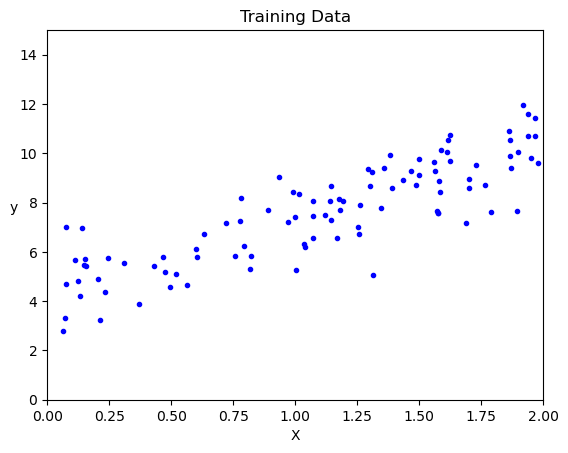

In [1]:
# Generating data set

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plots the training data

plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.title("Training Data")
plt.show()

In [2]:
# Creates additional feature values for x0 for each instance
X_new = np.c_[np.ones((100, 1)), X]

# Computing θ values
theta = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)

# Shows θ values
print(theta)

[[4.27076514]
 [3.00482905]]


In [3]:
# Making predictions using theta

X_test = np.array([[0], [2]])               # Creates two data points
X_test_new = np.c_[np.ones((2, 1)), X_test] # Creates additional feature values for x0 for each instance

predictions = X_test_new.dot(theta)
print(predictions)

[[ 4.27076514]
 [10.28042323]]


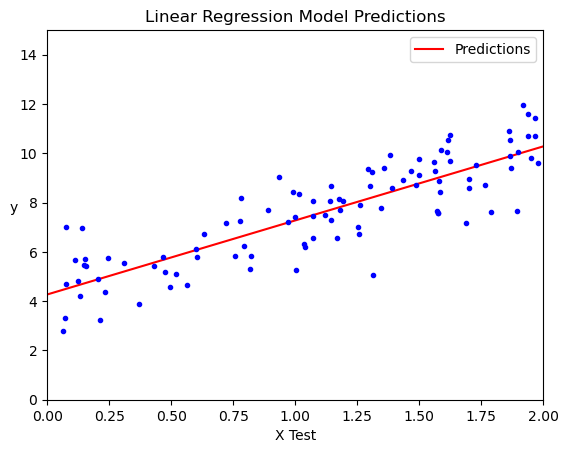

In [4]:
# Plots the predictions

plt.plot(X_test, predictions, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("X Test")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.title("Linear Regression Model Predictions")
plt.show()

**Performing Linear Regression using Scikit-Learn framework**

In [5]:
lr_model = LinearRegression()
lr_model.fit(X, y)

print("Linear Regression Model Parameters: {} (intercept), {} (coefficient)".format(
    lr_model.intercept_, lr_model.coef_))


Linear Regression Model Parameters: [4.27076514] (intercept), [[3.00482905]] (coefficient)


In [6]:
# Making predictions using Linear Regression model

lr_model_predictions = lr_model.predict(X_test)
print("Linear Model Predictions:", lr_model_predictions)

Linear Model Predictions: [[ 4.27076514]
 [10.28042323]]


In [7]:
# Linear Regression is based on Least Square (numpy.linalg.lstsq)
# and can be called directly as shown below.

theta_svd, residuals, rank, s = np.linalg.lstsq(X_new, y, rcond=1e-6)
print(theta_svd)

[[4.27076514]
 [3.00482905]]


## Gradient Descent

### Batch Gradient Descent

In [10]:
# Sets learning rate
eta = 0.1

# Seting fix number of iternations
n_iterations = 1000

# Setting number of training examples to 100
m = 100

# Initializes model parameters randomly
theta = np.random.randn(2, 1)

for i in range(n_iterations):
    gradients = 2/m * X_new.T.dot(X_new.dot(theta) - y)
    theta = theta - eta * gradients

# prints theta values
print(theta)

[[4.27076514]
 [3.00482905]]


### Stochastic Gradient Descent (SGD)

In [12]:
# <Place holder>

## Polynomial Regression

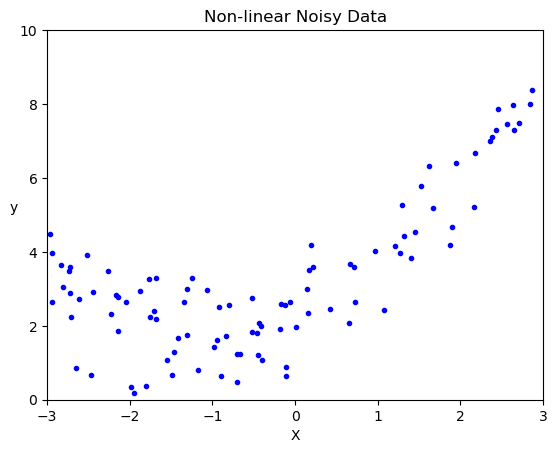

In [3]:
# Generating some non-linear data

m = 100                                         # number of training instances

X = 6 * np.random.rand(m, 1) - 3                # Feature values
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # Generates target

# Plots the data

plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.title("Non-linear Noisy Data")
plt.show()

As straight line won't fit this data properly, use polynomial feature to transform the training data by adding square of each feature in the training data set as new feature.

In [6]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [24]:
# Shows the transformed training data set

display(
    pd.DataFrame(
        {"X": X.reshape(-1), "X_poly": X_poly[:,1], "y": y.reshape(-1)}
    ).head()
)

,X,X_poly,y
0,-1.312390,1.722367,2.989483
1,0.194835,0.037961,4.193960
2,-0.801244,0.641993,2.559724
3,-1.764847,3.114684,3.268843
4,-2.803998,7.862404,3.056533


In [27]:
# Now, fits a linear regression model to the training data

lr_model = LinearRegression()
lr_model.fit(X_poly, y)

# Prints model parameters
print("Intercept:", lr_model.intercept_, "Coefficients:", lr_model.coef_)

Intercept: [2.20624461] Coefficients: [[0.94364897 0.44045415]]


Intercept and coefficient for term $x^2$ are very close to parameters that were used to generate target. Intercept was 2 + Gaussian noise, and coefficient for $x^2$ was 0.5

## Learning Curves

In [33]:
def plot_learning_curves(model, X, y):
    """
    Plots model's prediction performance on traning and validation data
    """
    
    # Splits data into training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    # Lists to store training and validation error
    train_errors, val_errors = [], []
    
    # Iterates through different size of training set
    for m in range(1, len(X_train)):
        # Fits the model on the specified size of the training data
        model.fit(X_train[:m], y_train[:m])
        
        # Performs prediction on the training set the model was trained on
        y_train_predict = model.predict(X_train[:m])
        
        # Performs the prediction on the validation data
        y_val_predict = model.predict(X_val)
        
        # Appends the calculated MSE for both training and validation error
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    # Plots training error vs validation error as a function of training data size
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curve")
    plt.show()

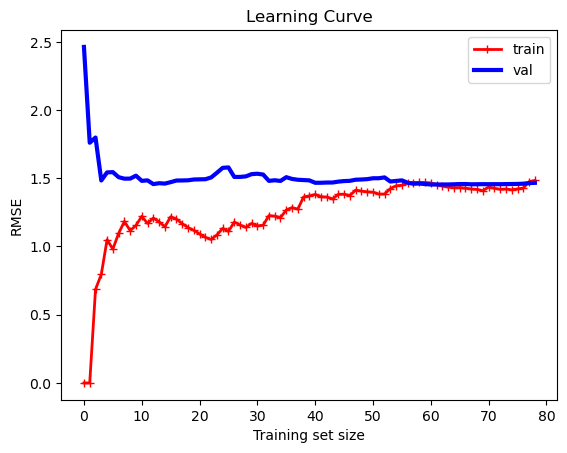

In [34]:
# Initializes Linear Regression model and plots the learning curve

lr_model = LinearRegression()
plot_learning_curves(lr_model, X, y)

Analysing the above Learning Curve of Linear Regression model:

- Training error continued increasing with the increase of training data size till reaching a plateau
- Validation error continued descreasing with the increase of training data size till reaching a plateau
- Both curves have reached plateau as the model has underfitted the training data leaving options such as 
    - Considering relative complex model to use
    - Creating better features

## Regularized Linear Models

### Ridge Regression

In [39]:
# Instantiate Ridge Regression model
ridge_reg_model = Ridge(alpha=1, solver="cholesky")

# Fits the model
ridge_reg_model.fit(X, y)

# Performs prediction
print("Ridge Regressor Prediction:", ridge_reg_model.predict([[1.5]]))

Ridge Regressor Prediction: [[4.74185618]]


In [41]:
# Regularization in SGD Regression

# Instantiate SGD Regressor model
sgd_reg_model = SGDRegressor(penalty="l2")

# Fits the model
sgd_reg_model.fit(X, y.ravel())

print("SGD Regressor Prediction:", sgd_reg_model.predict([[1.5]]))

SGD Regressor Prediction: [4.72404269]
